# ANDES Verification using the CURENT NPCC 14-Bus System

Prepared by [Hantao Cui](https://cui.eecps.com). Last revised 23 May 2020. 

## Background 

The [CURENT](https://curent.utk.edu) NPCC test system contains 140 buses, 233 branches, and 48 generators. Dynamic data uses models GENROU, GENCLS, TGOV1 and IEEEX1.

One line trip scenario is used to verify ANDES simulation results with DSATools TSAT.

## Simulation Parameters

Integretion method: Trapezidal Rule (ANDES and TSAT).

Time step size: `1/120` sec. (Note: step size between `1/30` to `1/120` has little impact on the ANDES results. One can use `tstep=1/30` to obtain almost the same results.)

Load conversion: static loads are converted to 100% constant impedances for both P and Q. 

TSAT automatic parameter correction is disabled.

## Initialization

Power flow solutions are identical across all the two software.

GENROU initialization ($E_{FD}$, $E_{TERM}$, $P$, $Q$, $\delta$, $I_d$ and $I_q$) is identical to that from **PSS/E** for all cases (with and without generator saturation). Note that $I_d$ and $I_q$ are in machine base in PSS/E but in system base in ANDES.  

GENROU initialization (including all the internal variables $E'_d$, $E'_q$, $\psi_{kd}$, $\psi_{kq}$, $\psi''_d$, and $\psi''_q$) is identical to that from [**OpenIPSL**](https://github.com/openipsl/openipsl).

No controller limit violation occurs during initialization.

## Conclusion

NPCC simulation results from ANDES are identical to that from TSAT.

In [1]:
import andes
import numpy as np
from andes.utils.tsat import tsat_to_df, plot_comparison, run_cmp

andes.config_logger(stream_level=30)

In [2]:
omega_lt2s = tsat_to_df('omega_lt2s.xls')
v_lt2s = tsat_to_df('v_lt2s.xls')

# Scenario 1: Line 1-2 trips at 1 sec. and reconnects after 2.0 sec.

The reconnection delay is set to 2 seconds to trigger a large disturbance to the system to verify nonlinear models.

## Simulation Setup

In [3]:
ss = run_cmp('npcc.raw', dyr='npcc.dyr', fault_line='Line_1',
             t1=1.0, t2=3.0, tstep=1/120)

<Toggler Toggler_1>: Line.Line_1 status changed to 0.0 at t=1.0 sec.  
<Toggler Toggler_2>: Line.Line_1 status changed to 1.0 at t=3.0 sec.  
100%|████████████████████████████████| 100/100 [00:10<00:00,  9.59%/s]


In [4]:
# line information
ss.Line.cache.df_in.iloc[0]

idx       Line_1
u              1
name      Line_1
bus1           1
bus2           2
Sn           100
fn            60
Vn1          345
Vn2          345
r         0.0004
x         0.0043
b           0.07
g              0
b1             0
g1             0
b2             0
g2             0
trans          0
tap            1
phi            0
owner       None
xcoord      None
ycoord      None
Name: 0, dtype: object

## Scenario 1 Plots

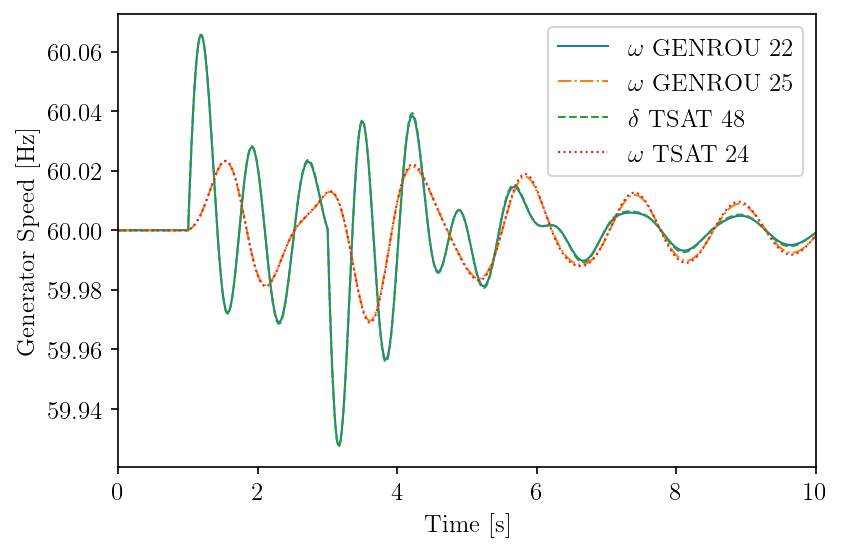

In [5]:
tsat_omega_headers = [ss.TDS.plt._fname[i] for i in ss.GENROU.omega.a]
tsat_omega_headers = [i.replace('GENROU', 'TSAT') for i in tsat_omega_headers]

fig, ax = plot_comparison(ss, ss.GENROU.omega, omega_lt2s,
                a=[0, 3], ylabel="Generator Speed [Hz]",
                tsat_header=tsat_omega_headers,
                scale=60, right=10)

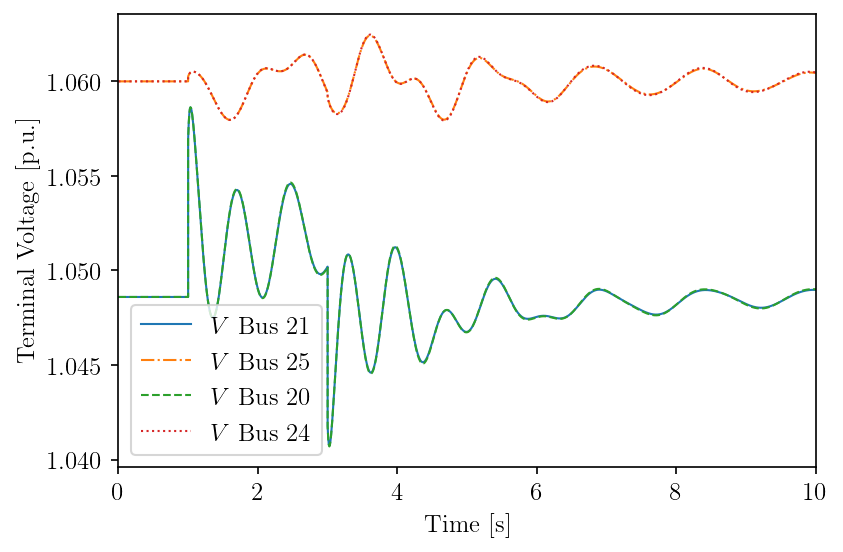

In [6]:
tsat_v_headers = [ss.TDS.plt._fname[i + ss.dae.n] for i in ss.GENROU.v.a]
tsat_v_headers = [i.replace('GENROU', 'TSAT') for i in tsat_v_headers]

fig, ax = plot_comparison(ss, ss.GENROU.v,
                          v_lt2s, a=[0, 5],
                          ylabel="Terminal Voltage [p.u.]",
                          tsat_header=tsat_v_headers, right=10)

# Appendix: CURENT NPCC 140-Bus System Data

## Power Flow Data (PSS/E RAW format)

In [7]:
data = !cat npcc.raw 
print('\n'.join(data))

0,   100.00,  32, 0, 1, 60.00     / PSS(R)E 32 RAW created by rawd32  MON, JUN 22 2015   8:32
CURENT NPCC 48-MACHINE TESTBED, CONVERTED FROM PST BY BIN WANG
REVISED BY YIN LEI, 11/18/2013
     1,'MILLSTONE PT', 345.0000,1,   1,   1,   1,1.01517,   4.8434
     2,'MONTVILLE   ', 345.0000,1,   1,   1,   1,1.01090,   4.0566
     3,'MONTVILLE   ', 115.0000,1,   1,   1,   1,0.99170,   4.0069
     4,'MONTVILLE   ', 345.0000,1,   1,   1,   1,1.01125,   4.1005
     5,'CARD ST     ', 345.0000,1,   1,   1,   1,1.00618,   2.3527
     6,'SHERMAN RD  ', 345.0000,1,   1,   1,   1,1.00594,   1.8603
     7,'MEDWAY      ', 345.0000,1,   1,   1,   1,1.02071,   3.2654
     8,'MILLBURY    ', 115.0000,1,   1,   1,   1,1.02151,   1.9975
     9,'CARPENTER HL', 115.0000,1,   1,   1,   1,1.01811,   1.0727
    10,'BRAYTON PT  ', 115.0000,1,   1,   1,   1,1.03060,   8.0176
    11,'BRAYTON PT  ', 115.0000,1,   1,   1,   1,1.01169,   6.7075
    12,'BRIDGEWATER ', 115.0000,1,   1,   1,   1,1.02371,   5.9431
    13,'

## Dynamic Data (PSS/E DYR format)

In [8]:
data = !cat npcc.dyr
print('\n'.join(data))

     21 'GENROU' 1     5.7000      0.30000E-01  0.35000      0.50000E-01
          4.6400       0.0000       1.9050       1.8075      0.36000
         0.36000      0.23270      0.20270       0.0000       0.0000    /
     22 'GENROU' 1     5.6900      0.30000E-01  0.35000      0.50000E-01
          4.0857       0.0000       1.8340       1.8060      0.30520
         0.30520      0.220955      0.200955       0.0000       0.0000    /
     23 'GENROU' 1     5.6000      0.30000E-01  0.35000      0.50000E-01
          2.4467       0.0000       1.7400       1.6800      0.24450
         0.24450      0.100799     0.090799   0.0000       0.0000    /
     23 'GENROU' 2     5.2000      0.30000E-01  0.35000      0.50000E-01
          6.2000       0.0000       2.1150       2.0400      0.54600
         0.54600      0.225511      0.205511       0.0000       0.0000    /
     24 'GENROU' 1     7.3000      0.30000E-01  0.35000      0.50000E-01
          4.3500       0.0000       2.0320       1.9280      0